In [ ]:
#Author:WitsOnTweets
    #This module Tests a given input string for positive or negative sentiment

In [3]:
#Usage:Libraries
    #keras:keras is high level Neural Network API written in python. It works on top of Theano, CNTK, Tensorflow. Here we chose 
    #Tensorflow as the backend for processing
    #Tokenizer:Helps to break the sentence in Tokens(Words)
    #numpy:python library for array manipulation
    #nltk:Natural Language Toolkit for Basic Text Processing . Here it is used to remove Stopwords(Words that dont convey any meaning)
    #pandas:pandas library providing high-performance, easy-to-use data structures and data analysis
    #EarlyStopping:Stops the Training Process after the validation accuracy stops increasing thus preventing overfitting of our model
    #WordNetLemmatizer:Converts the word to their Base Form
    #string:for removing punctuations in input string 
import json
import numpy as np
import keras
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
lemmatizer = WordNetLemmatizer()
from string import punctuation
import load_model_library as lm

Enter a string to be evaluated:the movie was not bad .. i  wasn't dissapointed
Tweet after negation handling movie wa notbad wa ntdissapointed 
'ntdissapointed' not in training corpus; ignoring.
1
The sentiment of tweet is POSITIVE!!!



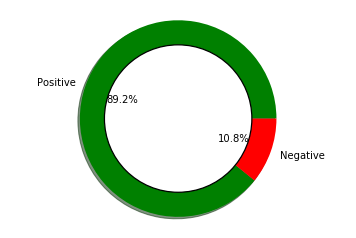

Enter a string to be evaluated:the policy of government is hurting the sentiment of the people
Tweet after negation handling policy government hurting sentiment people 
0
The sentiment of tweet is NEGATIVE!!!



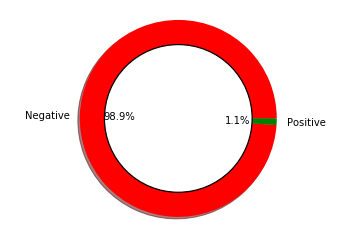

In [4]:
j=0
while j<2:
    evalSentence = input('Enter a string to be evaluated:')

    if len(evalSentence) == 0:
        break
    lm.sentiment_donut(evalSentence)
    j=j+1


In [ ]:
# read in your saved model structure
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
# and create a model from that
model = model_from_json(loaded_model_json)
# and weight your nodes with your saved values
model.load_weights('model.h5')

# okay here's the interactive part
j=0
while j<2:
    evalSentence = input('Enter a string to be evaluated:')

    if len(evalSentence) == 0:
        break

    # format your input for the neural net
    testArr = convert_text_to_index_array(evalSentence)
    input1 = tokenizer.sequences_to_matrix([testArr], mode='binary')
    # predict which bucket your input belongs in
    pred = model.predict(input1)
    
    # and print it for the humons
    print(("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)] * 100)))
    xx=1
    if np.argmax(pred)==1:
        xx=1
    else:
        xx=0
    donut(xx,pred)
    j=j+1